In [1]:
# Core data libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load datasets
trades_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

print("Trader data shape:", trades_df.shape)
print("Sentiment data shape:", sentiment_df.shape)

Trader data shape: (211224, 16)
Sentiment data shape: (2644, 4)


In [3]:
# Inspect trader data
print("Trader data columns:")
display(trades_df.head())
print(trades_df.info())

print("\n" + "-"*60 + "\n")

# Inspect sentiment data
print("Sentiment data columns:")
display(sentiment_df.head())
print(sentiment_df.info())

Trader data columns:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


In [4]:
# Convert trader timestamps
trades_df["Timestamp IST"] = pd.to_datetime(
    trades_df["Timestamp IST"],
    format="%d-%m-%Y %H:%M",
    errors="coerce"
)

# Create a date column for merging
trades_df["trade_date"] = trades_df["Timestamp IST"].dt.date

# Convert sentiment date
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])
sentiment_df["sentiment_date"] = sentiment_df["date"].dt.date

print("Timestamp conversion complete.")

Timestamp conversion complete.


In [5]:
# Standardize sentiment into Fear / Greed
sentiment_df["sentiment"] = sentiment_df["classification"].apply(
    lambda x: "Fear" if "Fear" in x else "Greed"
)

# Keep relevant columns only
sentiment_clean = sentiment_df[
    ["sentiment_date", "sentiment", "value"]
].copy()

sentiment_clean.rename(columns={"value": "sentiment_score"}, inplace=True)

sentiment_clean.head()

,sentiment_date,sentiment,sentiment_score
0,2018-02-01,Fear,30
1,2018-02-02,Fear,15
2,2018-02-03,Fear,40
3,2018-02-04,Fear,24
4,2018-02-05,Fear,11


In [6]:
trades_clean = trades_df[
    [
        "Account",
        "Coin",
        "Side",
        "Direction",
        "Size USD",
        "Execution Price",
        "Closed PnL",
        "Fee",
        "trade_date"
    ]
].copy()

trades_clean.head()


,Account,Coin,Side,Direction,Size USD,Execution Price,Closed PnL,Fee,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy,7872.16,7.9769,0.0,0.345404,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy,127.68,7.9800,0.0,0.005600,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy,1150.63,7.9855,0.0,0.050431,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy,1142.04,7.9874,0.0,0.050043,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,Buy,69.75,7.9894,0.0,0.003055,2024-12-02


In [7]:
print("Trader date range:")
print(trades_clean["trade_date"].min(), "to", trades_clean["trade_date"].max())

print("\nSentiment date range:")
print(sentiment_clean["sentiment_date"].min(), "to", sentiment_clean["sentiment_date"].max())


Trader date range:
2023-05-01 to 2025-05-01

Sentiment date range:
2018-02-01 to 2025-05-02


In [8]:
# Merge trades with sentiment on date
merged_df = trades_clean.merge(
    sentiment_clean,
    left_on="trade_date",
    right_on="sentiment_date",
    how="left"
)

print("Merged dataset shape:", merged_df.shape)
print("\nMissing sentiment values:")
print(merged_df["sentiment"].isna().sum())


Merged dataset shape: (211224, 12)

Missing sentiment values:
6


In [9]:
# Drop trades without sentiment context
merged_df = merged_df.dropna(subset=["sentiment"])

print("Shape after dropping missing sentiment:", merged_df.shape)
print("Remaining missing sentiment values:", merged_df["sentiment"].isna().sum())

Shape after dropping missing sentiment: (211218, 12)
Remaining missing sentiment values: 0


In [10]:
# Aggregate trader behavior at daily level by sentiment
daily_metrics = (
    merged_df
    .groupby(["trade_date", "sentiment"])
    .agg(
        total_trades=("Closed PnL", "count"),
        total_volume_usd=("Size USD", "sum"),
        avg_trade_size=("Size USD", "mean"),
        total_pnl=("Closed PnL", "sum"),
        avg_pnl=("Closed PnL", "mean"),
        pnl_std=("Closed PnL", "std")
    )
    .reset_index()
)

daily_metrics.head()

,trade_date,sentiment,total_trades,total_volume_usd,avg_trade_size,total_pnl,avg_pnl,pnl_std
0,2023-05-01,Greed,3,477.00,159.000000,0.000000,0.000000,0.000000
1,2023-12-05,Greed,9,50005.83,5556.203333,0.000000,0.000000,0.000000
2,2023-12-14,Greed,11,113203.35,10291.213636,-205.434737,-18.675885,179.663534
3,2023-12-15,Greed,2,10609.95,5304.975000,-24.632034,-12.316017,4.474304
4,2023-12-16,Greed,3,15348.77,5116.256667,0.000000,0.000000,0.000000


In [11]:
# Check how many daily records exist per sentiment
daily_metrics["sentiment"].value_counts()

,count
sentiment,
Greed,374
Fear,105


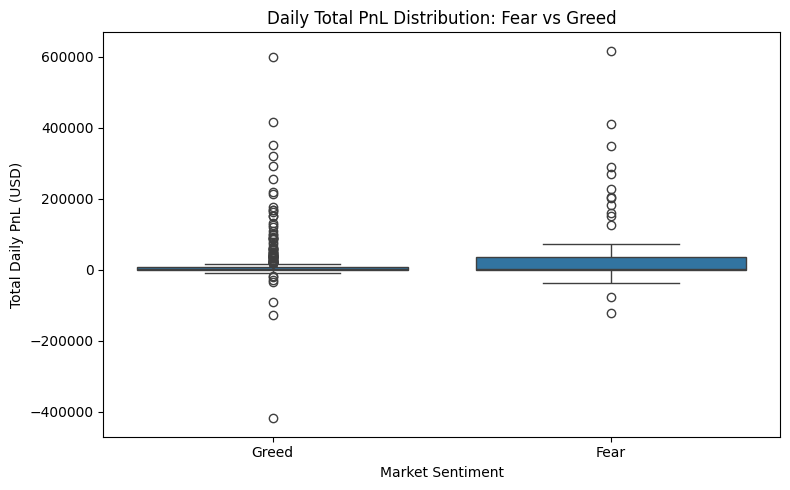

In [12]:
# Compare total daily PnL distributions by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=daily_metrics,
    x="sentiment",
    y="total_pnl"
)

plt.title("Daily Total PnL Distribution: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Daily PnL (USD)")
plt.tight_layout()
plt.show()

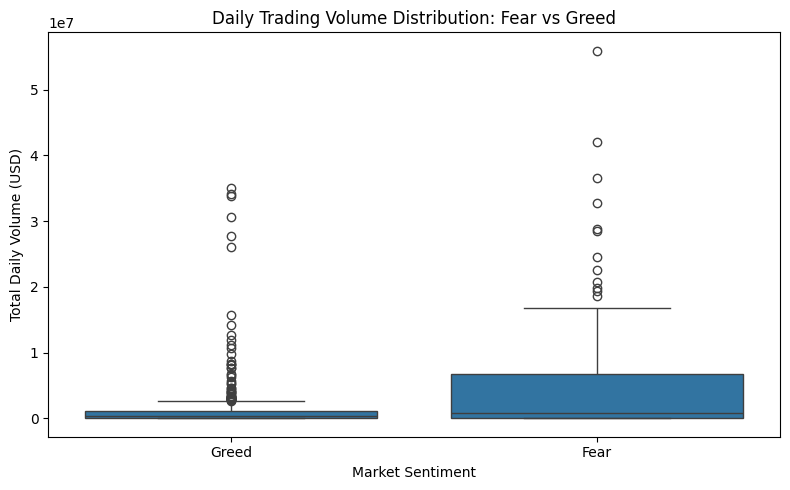

In [13]:
# Compare daily trading volume by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=daily_metrics,
    x="sentiment",
    y="total_volume_usd"
)

plt.title("Daily Trading Volume Distribution: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Daily Volume (USD)")
plt.tight_layout()
plt.show()


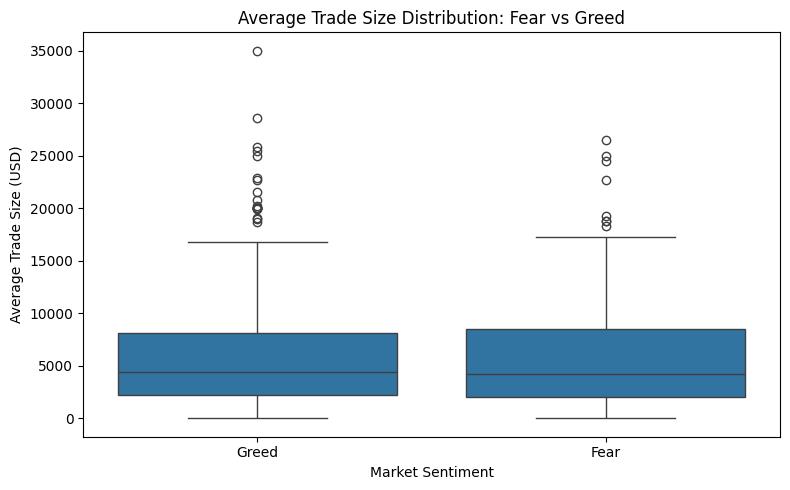

In [14]:
# Compare average trade size by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=daily_metrics,
    x="sentiment",
    y="avg_trade_size"
)

plt.title("Average Trade Size Distribution: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.tight_layout()
plt.show()

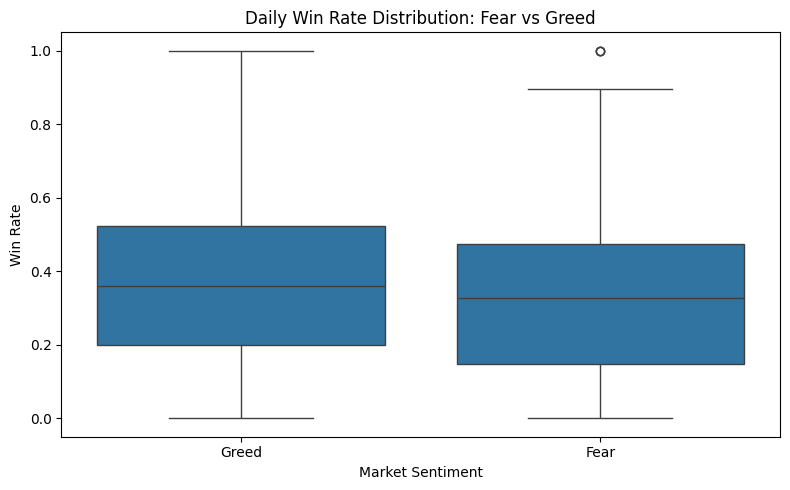

In [15]:
# Calculate win rate at daily level
daily_winrate = (
    merged_df
    .assign(win=lambda x: x["Closed PnL"] > 0)
    .groupby(["trade_date", "sentiment"])
    .agg(
        win_rate=("win", "mean"),
        total_trades=("win", "count")
    )
    .reset_index()
)

# Visualize win rate by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=daily_winrate,
    x="sentiment",
    y="win_rate"
)

plt.title("Daily Win Rate Distribution: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Win Rate")
plt.tight_layout()
plt.show()

In [16]:
# Create outputs directory if it doesn't exist
import os
os.makedirs("outputs", exist_ok=True)

print("outputs/ directory is ready.")

outputs/ directory is ready.


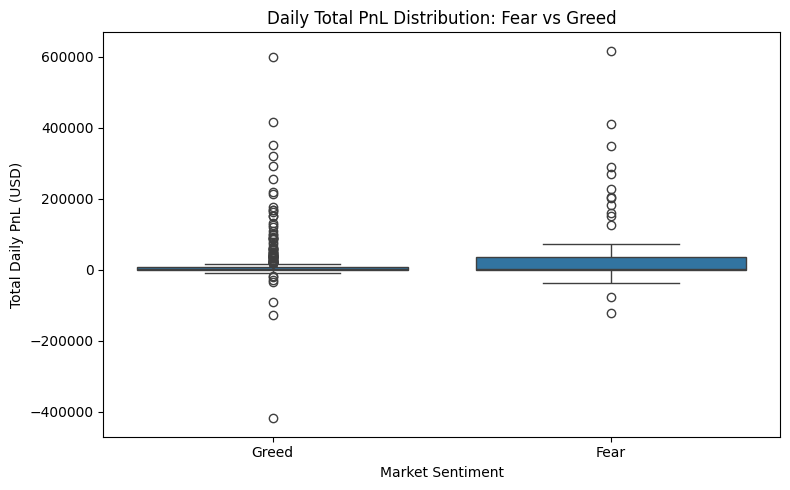

In [17]:
# Save Daily Total PnL vs Sentiment plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=daily_metrics,
    x="sentiment",
    y="total_pnl"
)

plt.title("Daily Total PnL Distribution: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Daily PnL (USD)")
plt.tight_layout()

plt.savefig("outputs/pnl_vs_sentiment.png", dpi=300)
plt.show()

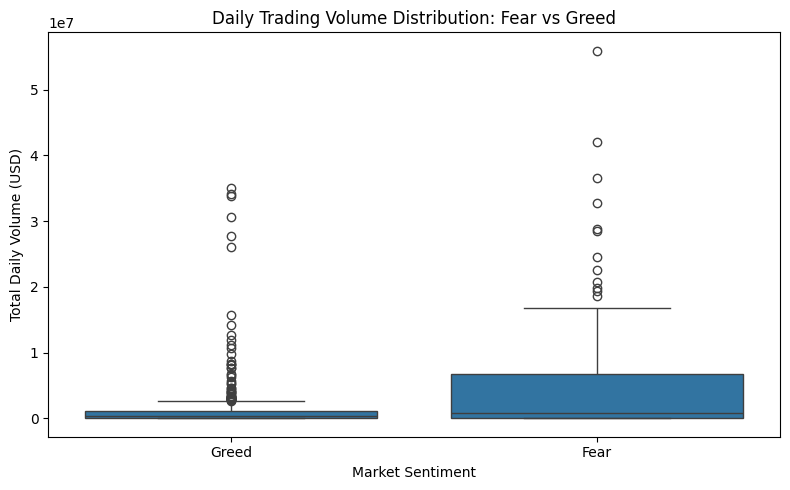

In [18]:
# Save Daily Trading Volume vs Sentiment plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=daily_metrics,
    x="sentiment",
    y="total_volume_usd"
)

plt.title("Daily Trading Volume Distribution: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Daily Volume (USD)")
plt.tight_layout()

plt.savefig("outputs/volume_vs_sentiment.png", dpi=300)
plt.show()

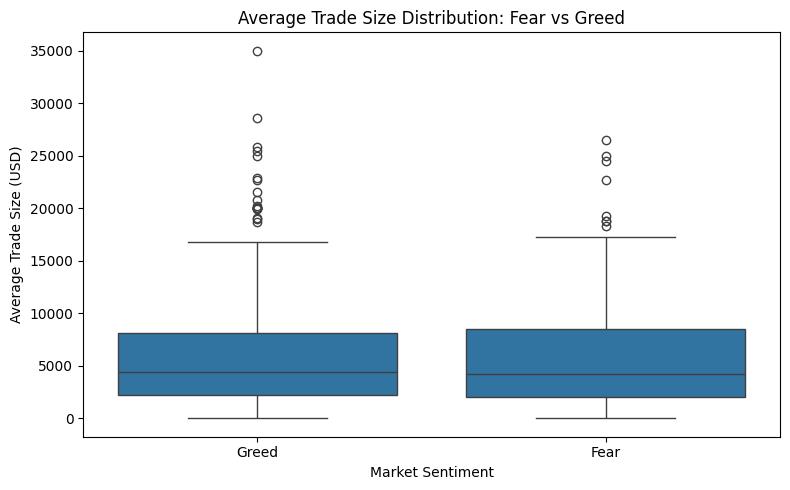

In [19]:
# Save Average Trade Size vs Sentiment plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=daily_metrics,
    x="sentiment",
    y="avg_trade_size"
)

plt.title("Average Trade Size Distribution: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.tight_layout()

plt.savefig("outputs/avg_trade_size_vs_sentiment.png", dpi=300)
plt.show()

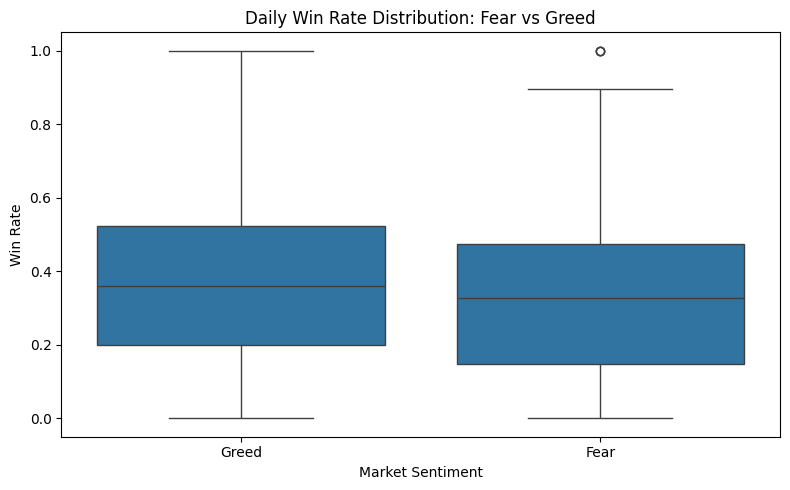

In [20]:
# Save Daily Win Rate vs Sentiment plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=daily_winrate,
    x="sentiment",
    y="win_rate"
)

plt.title("Daily Win Rate Distribution: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Win Rate")
plt.tight_layout()

plt.savefig("outputs/win_rate_vs_sentiment.png", dpi=300)
plt.show()

In [21]:
# Ensure csv_files directory exists
import os
os.makedirs("csv_files", exist_ok=True)

# Save daily metrics
daily_metrics.to_csv("csv_files/daily_metrics.csv", index=False)

print("daily_metrics.csv saved in csv_files/")

daily_metrics.csv saved in csv_files/
